<a href="https://colab.research.google.com/github/KrushnaChaure/NYC-Taxi-Trip-Time-Prediction/blob/main/Krushna_Chaure_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - NYC Taxi Trip Time Prediction**

**Project Type** - Regression

**Contribution** - Individual 

# **Problem Statement**

Our task is to build a machine learning model that predicts the total ride duration of taxi trips in New York City. Our primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.


# **Lets Begin & Kick start our journy**

## **1.Know Our Data**

### Import Libraries

In [2]:
#Install Library  use to calculate the haversine distance 

!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Importing necessary libraries for our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as math
import warnings
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')
from haversine import haversine
from datetime import datetime
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
import xgboost
# Importing Machine Learning Libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

### Dataset Loading


In [7]:
# Firstly we mount the drive over this colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Here we connecting & importing the dataset over this colab notebook
dataset= pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/NYC Taxi Trip Time Prediction - Krushna Chaure/NYC Taxi Data.csv')

### Dataset First View

In [9]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [11]:
# For finding how many rows & columns in our dataset
dataset.shape

(1458644, 11)

### Dataset Information

In [13]:
# For finding information about our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


### Duplicate Values

In [14]:
# Here we checking duplicate values in our dataset
len(dataset[dataset.duplicated()])

0

### Missing Values/Null Values

In [16]:
# For checking NAN or Misssing/Null values in our dataset
print(dataset.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


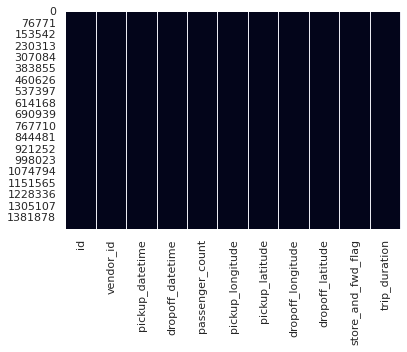

In [17]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### Understanding and Found some information about our dataset

The dataset given is dataset which is get from NYC Taxi and Limousine commission and we have to analysis total ride duration of taxi trips in new york city.

Our goal is to analysis different factors which affects taxi trip ride duration and by considering factors our end goal is to predict precise trip duration.

The above dataset has 1458644 rows and 11 columns. There are no mising values and duplicate values in the dataset.

### Now understanding the variables available in dataset 

In [19]:
# Dataset column name
dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [21]:
# Dataset description
dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


From above decription of Dataset we can see that passenger_count varies from 0 to 9.

Trip_duration has max value of 3526282 seconds which is almost 979.5 hours and minimum value 1 second.

This is exactly outlier present so this affect badly our prediction, our prediction not come precisly so thats why we want to remove this outliers. 

### Variables Description

**Independent variable:-**

*   **id** - Unique identifier for each trip.
*   **vendor_id** - Code indicating the provider associated with the trip record.



*   **pickup_datetime** - Date and Time when the meter was engaged.

*   **dropoff_datetime** - Date and Time when the meter was disengaged.

*   **passenger_count** - The number of passengers in the vehicle (driver entered value)

*   **pickup_longitude** - The longitude where the meter was engaged.
*   **pickup_latitude** - The latitude where the meter was engaged.


*   **dropoff_longitude** - The longitude where the meter was disengaged.




*   **dropoff_latitude** - The latitude where the meter was disengaged.


*   **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

**Dependent or Target variable:-**


*   **trip_duration** - Duration of the trip in seconds.






Now we are Categorizing the Independent variable :

Let's divide Independent variable into categories:


*   *Geographical:* pickup_longitude , pickup_latitude , dropoff_longitude , dropoff_latitude.
*   *Time related:* pickup_datetime, dropoff_datetime.

*   *Identifier:* id(not useful for analysis)
*   *Others:* vendor_id, passenger_count, store_and_fwd_flag. 

